In [21]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the parameters
epsilon = 2
min_points = 2

data = [[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]
# Define the data points
data_points = np.array(data)

# Compute DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_points)
clusters = dbscan.fit_predict(data_points)

# Print the clusters
print("Clusters:", clusters)

# Print the core points
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
print("Core points:", data_points[core_samples_mask])

# Print the border points
border_points = data_points[~core_samples_mask]
print("Border points:", border_points)

# Print the outliers
outliers = data_points[clusters == -1]
print("Outliers:", outliers)


Clusters: [-1 -1  0  1  0  0 -1  1]
Core points: [[8 4]
 [5 8]
 [7 5]
 [6 4]
 [4 9]]
Border points: [[ 2 10]
 [ 2  5]
 [ 1  2]]
Outliers: [[ 2 10]
 [ 2  5]
 [ 1  2]]


C:\Users\Phi\AppData\Local\Temp\ipykernel_16372\870694839.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(border_points[:, 0], border_points[:, 1], c='w', edgecolors='k', marker='x', label='Border Points')


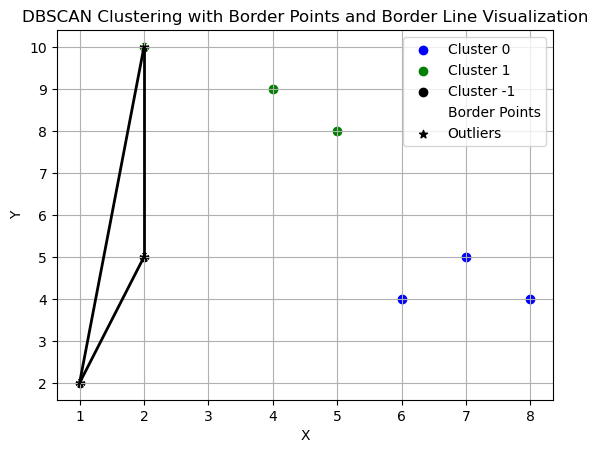

In [33]:
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Define the colors for different clusters
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Plot the data points
for cluster_label in set(clusters):
    if cluster_label == -1:
        # Plot outliers in black
        color = 'k'
    else:
        color = colors[cluster_label % len(colors)]
    cluster_mask = (clusters == cluster_label)
    plt.scatter(data_points[cluster_mask][:, 0], data_points[cluster_mask][:, 1], c=color, label=f'Cluster {cluster_label}')

# Plot core points
#plt.scatter(data_points[core_samples_mask][:, 0], data_points[core_samples_mask][:, 1], c='w', edgecolors='k', marker='o', label='Core Points')

# Plot border points
plt.scatter(border_points[:, 0], border_points[:, 1], c='w', edgecolors='k', marker='x', label='Border Points')

# Plot outliers
plt.scatter(outliers[:, 0], outliers[:, 1], c='k', marker='*', label='Outliers')

# Compute and plot the convex hull around border points
hull = ConvexHull(border_points)
for simplex in hull.simplices:
    plt.plot(border_points[simplex, 0], border_points[simplex, 1], 'k-', linewidth=2)

plt.title('DBSCAN Clustering with Border Points and Border Line Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
